# Rating Prediction

### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from matplotlib import pyplot

import warnings
warnings.filterwarnings('ignore')

#### Let's read the datasets

In [2]:
df=pd.read_csv('prediction excel sheet.csv')
df.head()

,Unnamed: 0,Rating,Reviews
0,0,4,Very Good camera in its price segment
1,1,4,Wonderful powerpacked value for money action c...
2,2,4,Great gadget at a decent price for Motovlogging
3,3,4,GoPro on a Budget
4,4,4,really reliable product at this price range


In [3]:
df.shape

(198, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  198 non-null    int64 
 1   Rating      198 non-null    int64 
 2   Reviews     198 non-null    object
dtypes: int64(2), object(1)
memory usage: 4.8+ KB


In [5]:
df.describe(include='all')

,Unnamed: 0,Rating,Reviews
count,198.000000,198.000000,198
unique,NaN,NaN,108
top,NaN,NaN,Wonderful
freq,NaN,NaN,9
mean,4.308081,4.414141,NaN
std,2.833992,0.653147,NaN
min,0.000000,3.000000,NaN
25%,2.000000,4.000000,NaN
50%,4.000000,5.000000,NaN
75%,7.000000,5.000000,NaN


In [6]:
df.dtypes

Unnamed: 0     int64
Rating         int64
Reviews       object
dtype: object

In [7]:
type(df)

pandas.core.frame.DataFrame

#### Exploratory Data Analysis

In [8]:
df.isnull().sum()

Unnamed: 0    0
Rating        0
Reviews       0
dtype: int64

In [9]:
corr=df.corr()
corr

,Unnamed: 0,Rating
Unnamed: 0,1.00000,-0.05831
Rating,-0.05831,1.00000


In [10]:
print(corr.shape)

(2, 2)


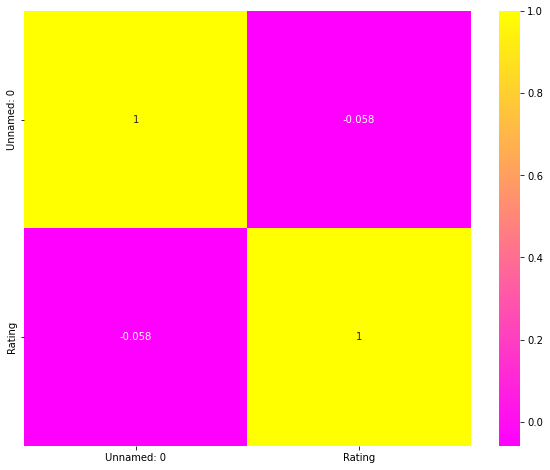

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='spring')
plt.show()

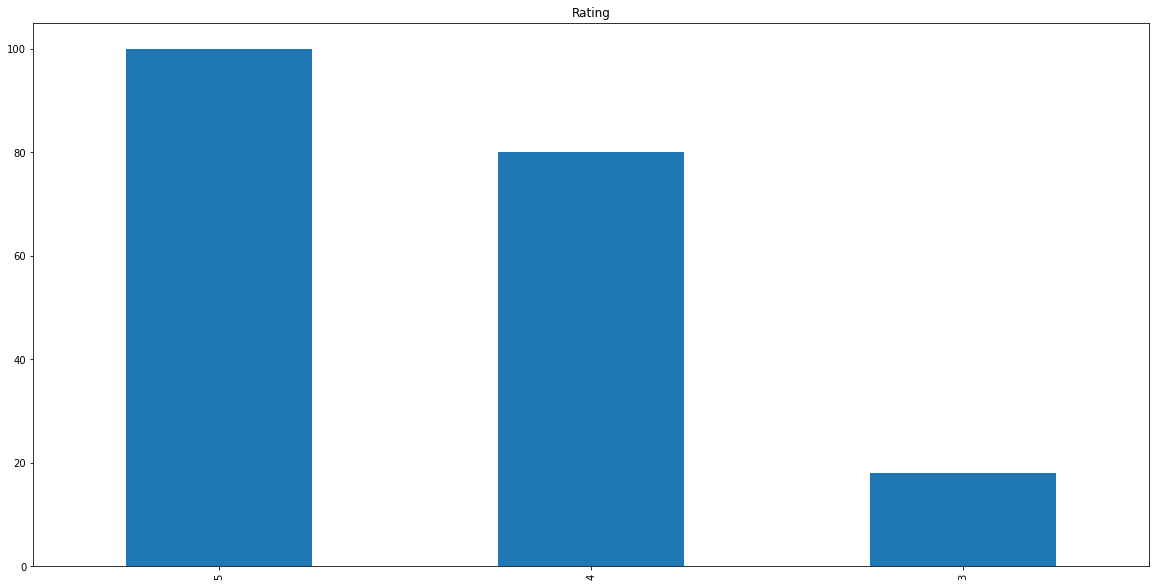

In [12]:
plt.subplot()
df['Rating'].value_counts().plot(kind='bar',title='Rating',figsize=(20,10));

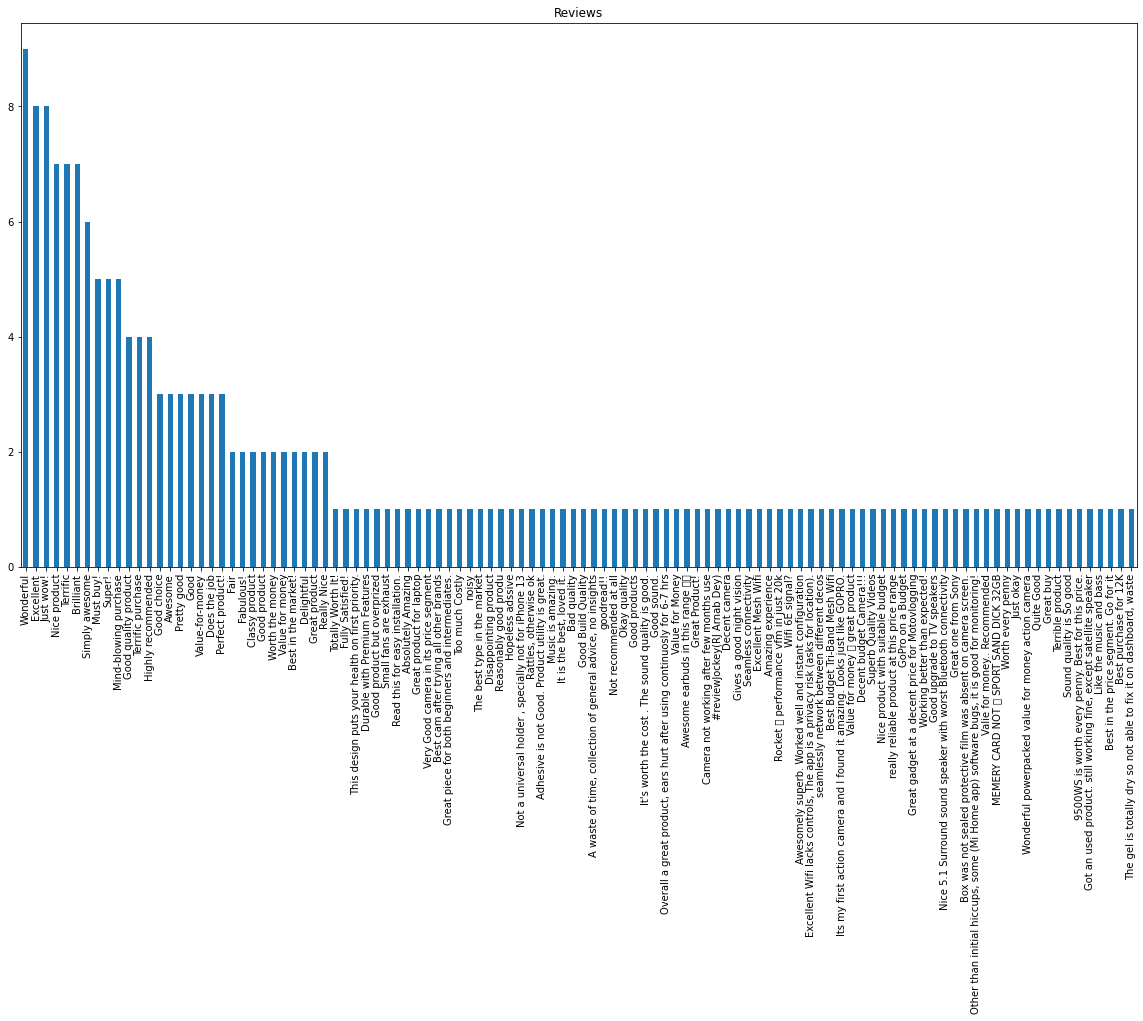

In [13]:
df['Reviews'].value_counts().plot(kind='bar',title='Reviews',figsize=(20,10));

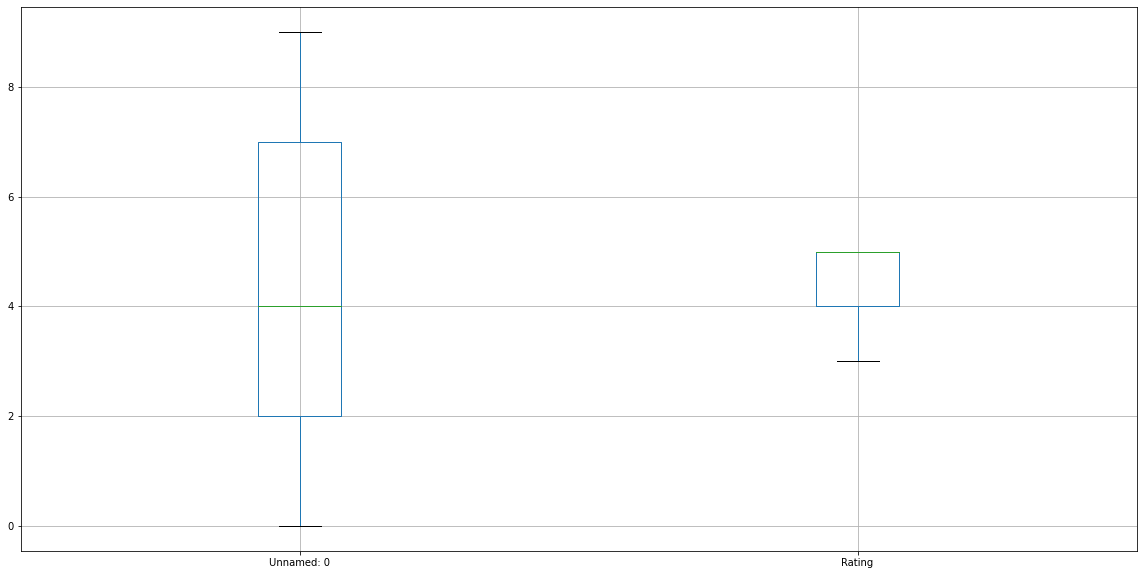

In [14]:
plt.figure(figsize=(20,10))
df.boxplot();

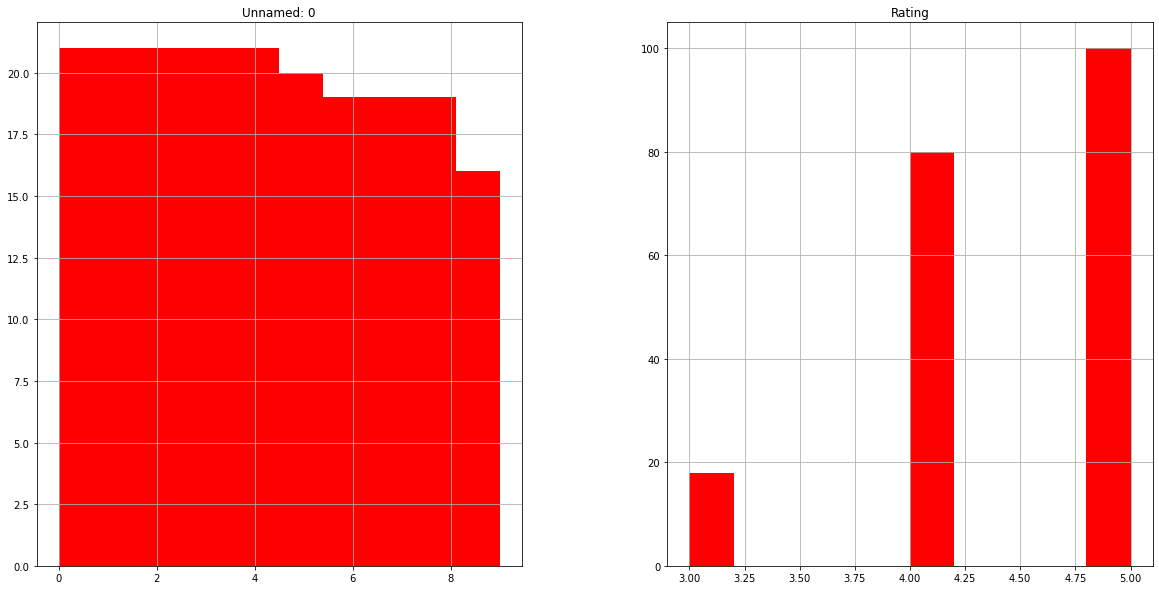

In [15]:
df.hist(color='r',figsize=(20,10))
plt.show()

        Rating
Rating     1.0


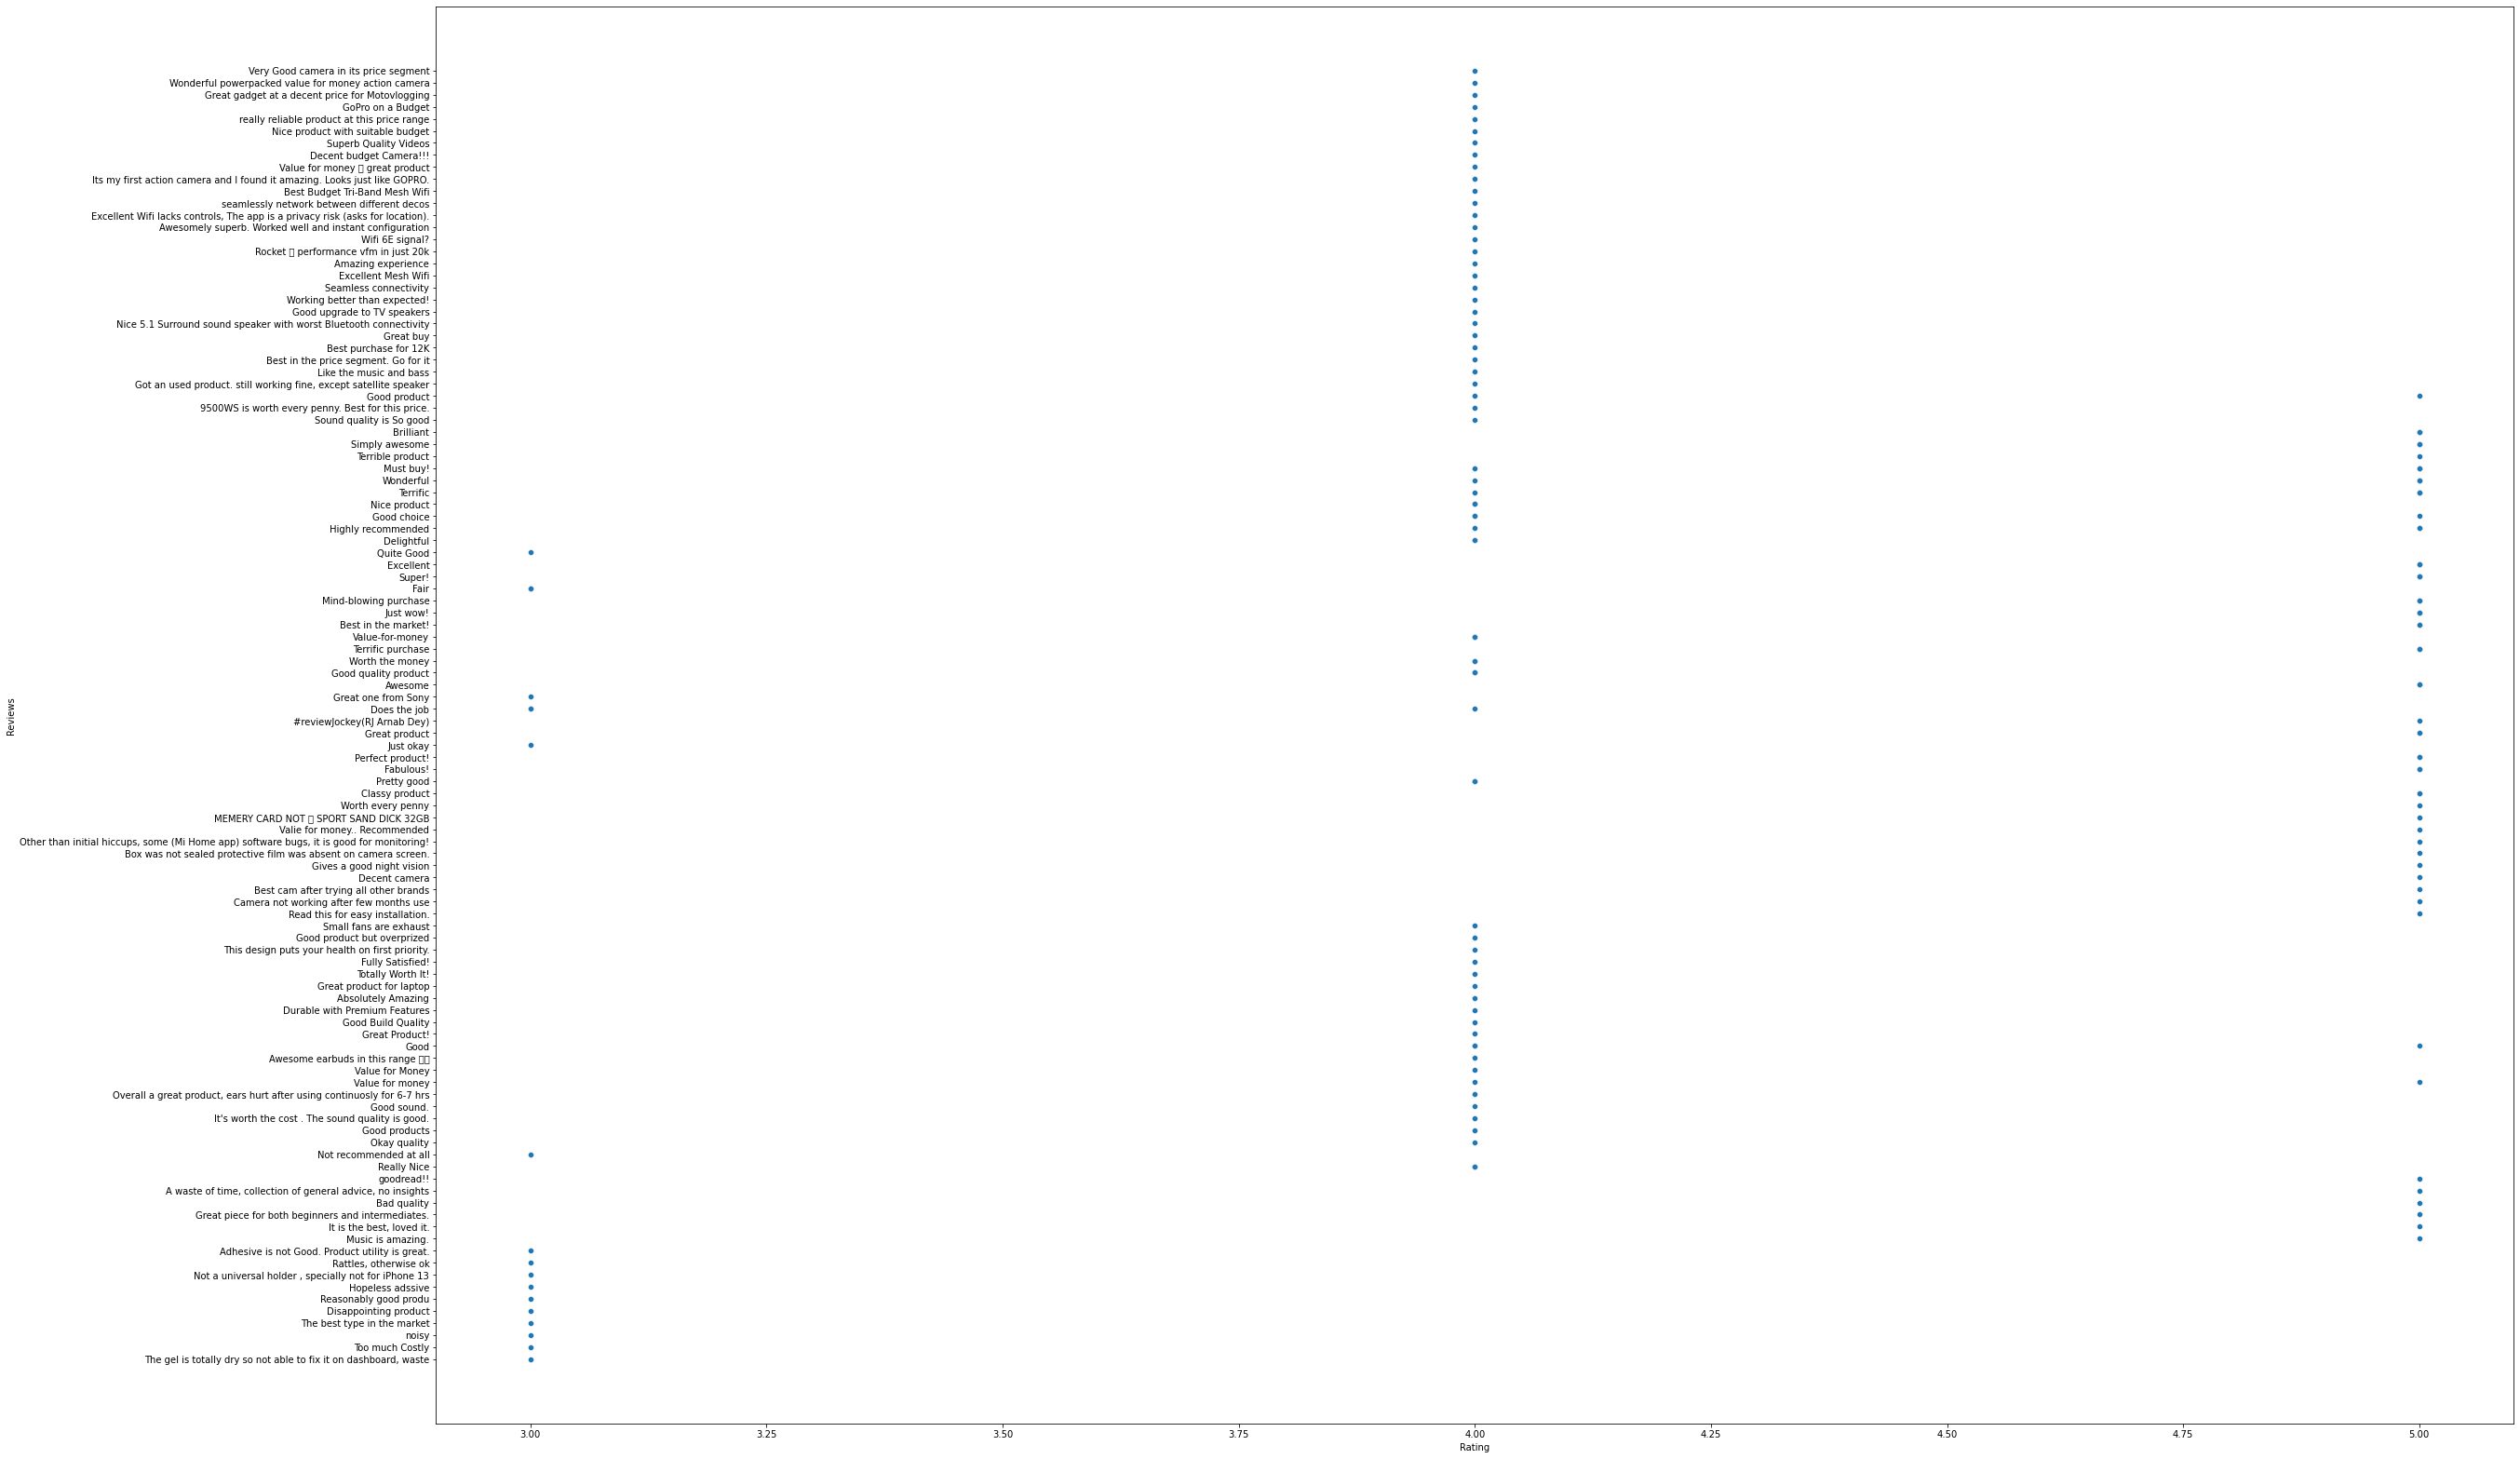

In [16]:
plt.figure(figsize=(40,28))
sns.scatterplot(df['Rating'],df['Reviews'])
print(df[['Rating','Reviews']].corr())
plt.show()

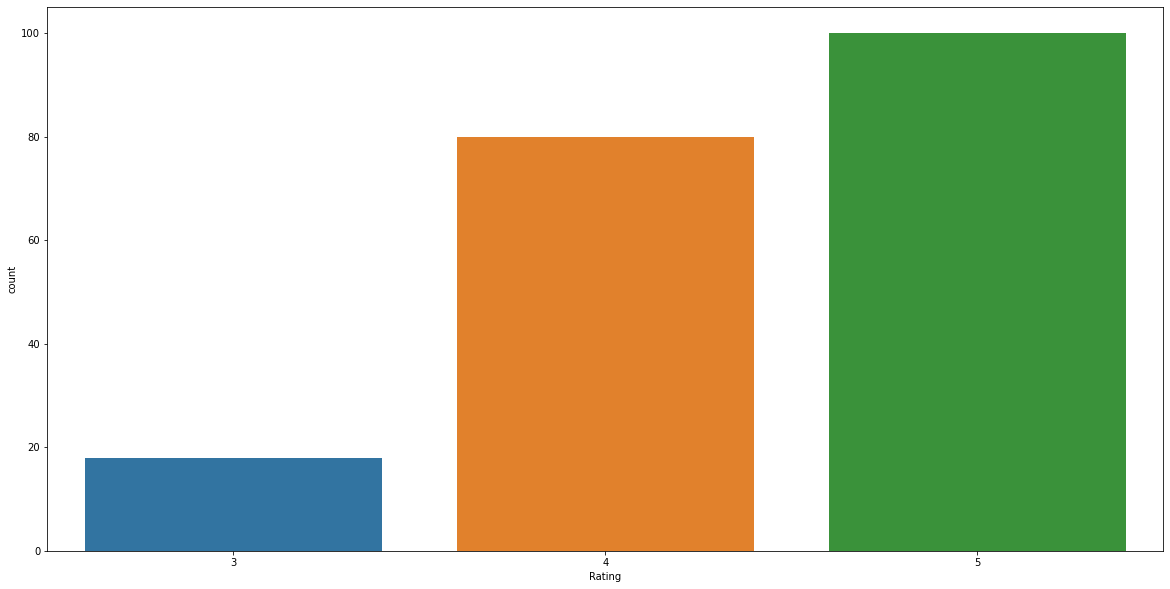

In [17]:
plt.figure(figsize=(20,10))
sns.countplot(df['Rating'])
plt.show()

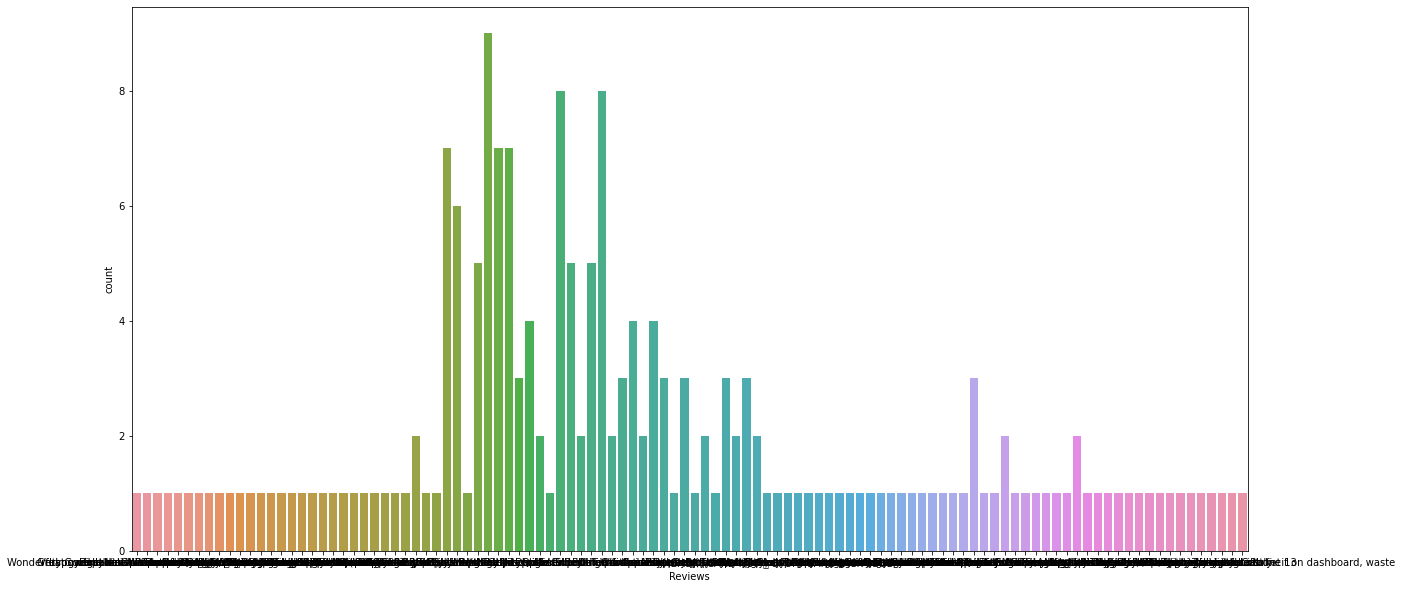

In [18]:
plt.figure(figsize=(20,10))
sns.countplot(df['Reviews'])
plt.show()

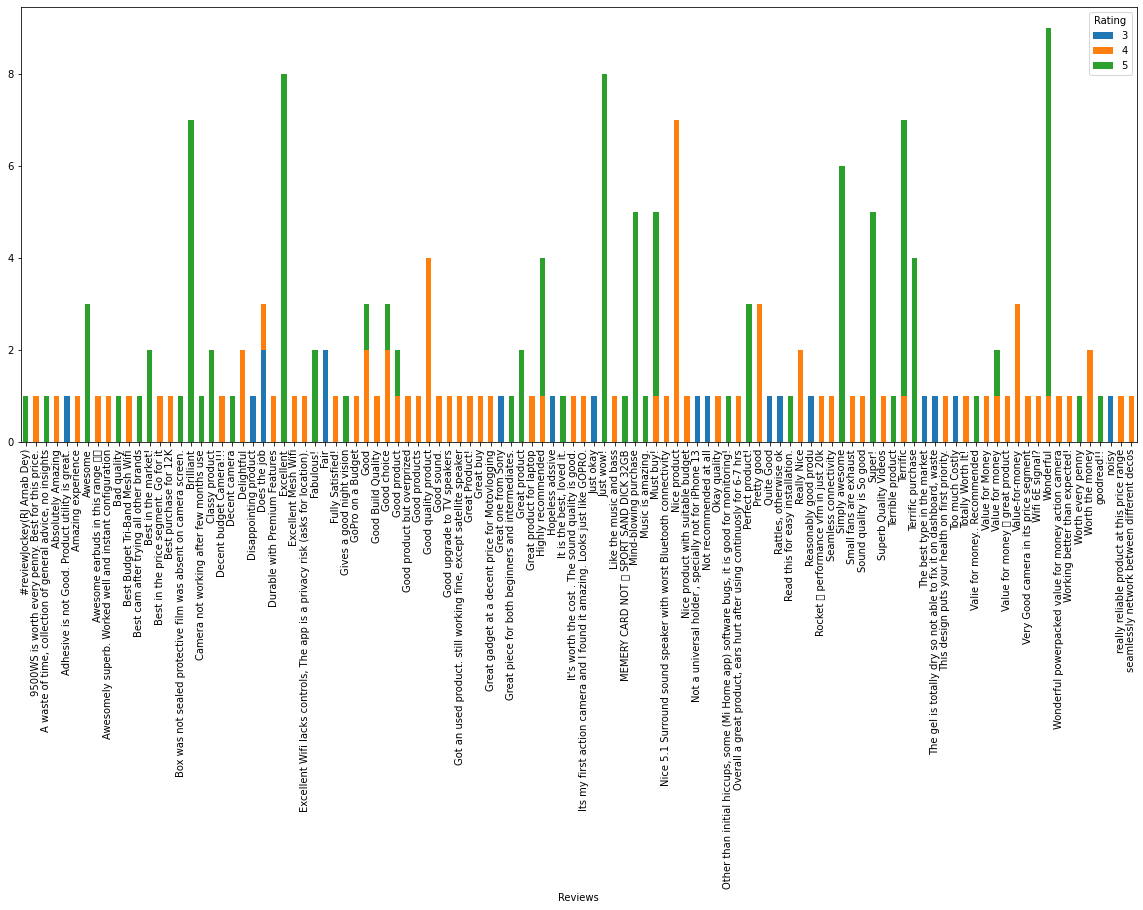

In [19]:
data=pd.crosstab(df['Reviews'],df['Rating'])
data.plot.bar(stacked=True,figsize=(20,8))
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Reviews', ylabel='Rating'>

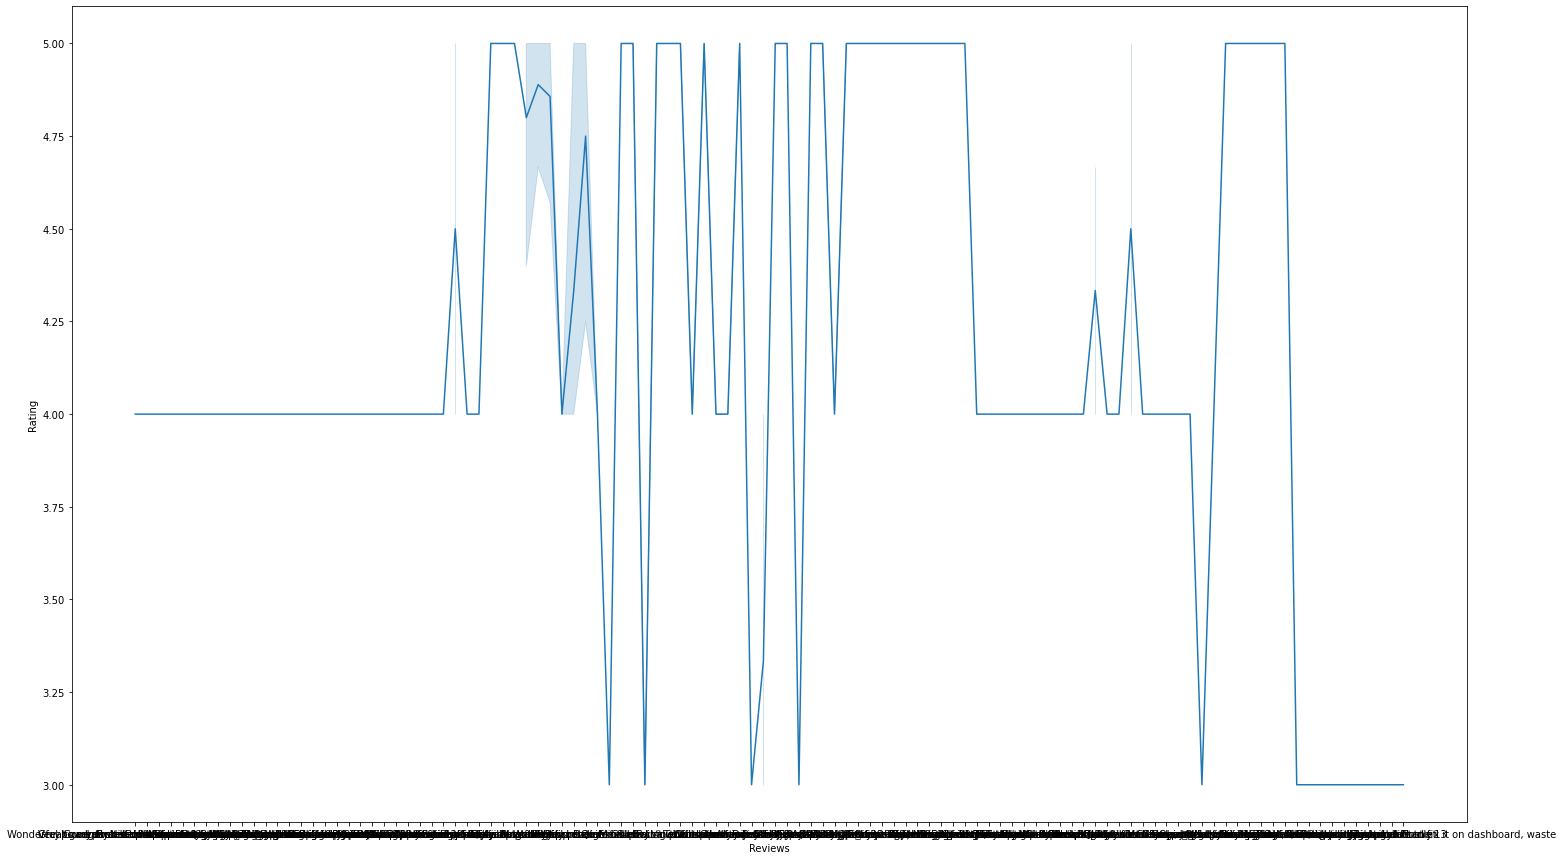

In [20]:
plt.figure(figsize=(25,15))
sns.lineplot(x='Reviews',y='Rating',data=df)

<AxesSubplot:xlabel='Rating', ylabel='Reviews'>

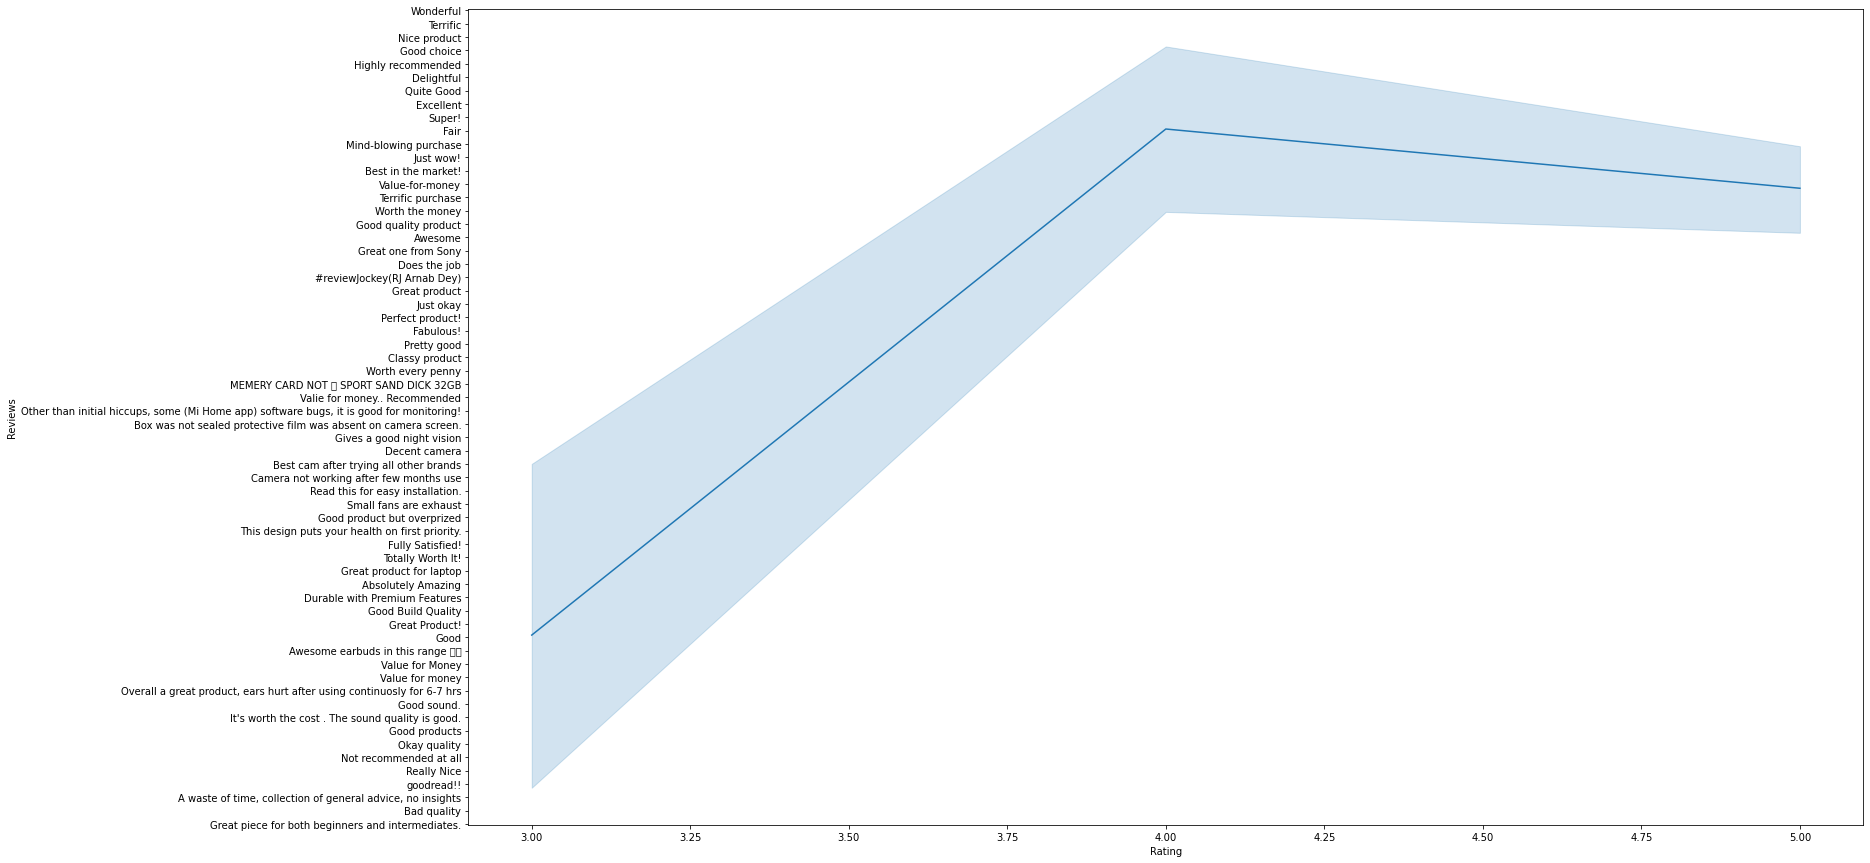

In [21]:
plt.figure(figsize=(25,15))
sns.lineplot(x='Rating',y='Reviews',data=df)

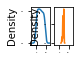

In [22]:
df.plot(kind='density',subplots=True,layout=(5,15),legend=False,fontsize=2);

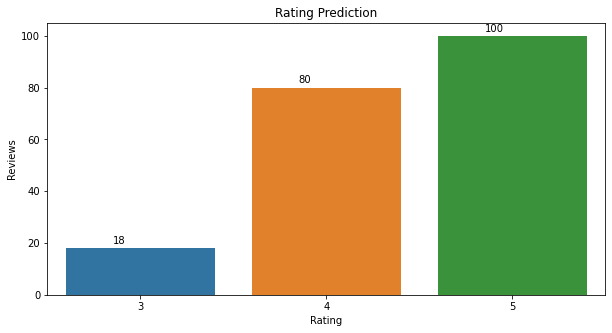

In [23]:
plt.figure(figsize=(10,5))
plt.title('Rating Prediction')
ax=sns.countplot(x='Rating',data=df)
plt.xlabel('Rating')
plt.ylabel('Reviews')
for i  in ax.patches:
    ax.annotate(int(i.get_height()), (i.get_x()+0.25, i.get_height()+1), va='bottom',color='black')

<Figure size 2880x2016 with 0 Axes>

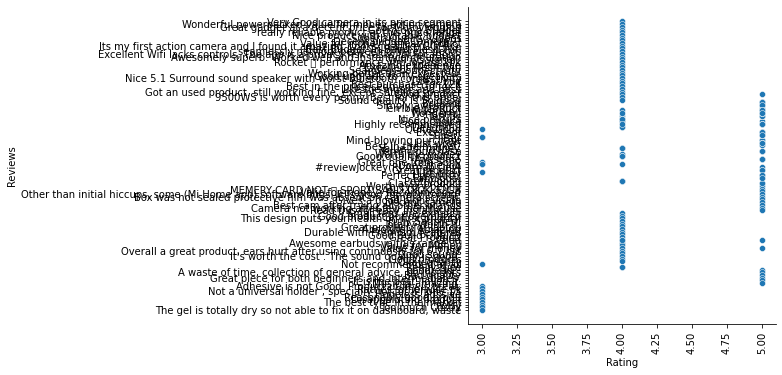

In [24]:
plt.figure(figsize=(40,28))
sns.relplot(x='Rating', y='Reviews',data=df)
plt.xticks(rotation=90);

In [25]:
sns.set_style('white')

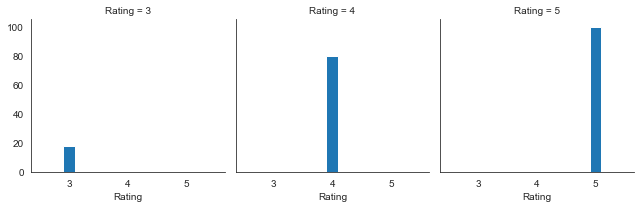

In [26]:
g=sns.FacetGrid(df,col='Rating')
g.map(plt.hist,'Rating',bins=5)

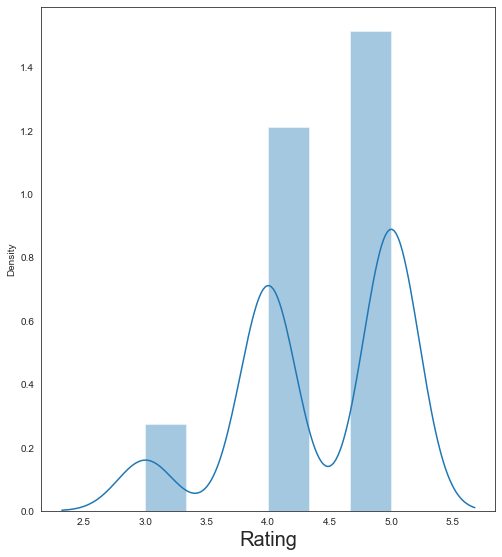

In [27]:
plt.figure(figsize=(20,15))
plotnumber  =  1

for column in df[['Rating']]:
    if plotnumber<=6:
        ax  =  plt.subplot(2,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

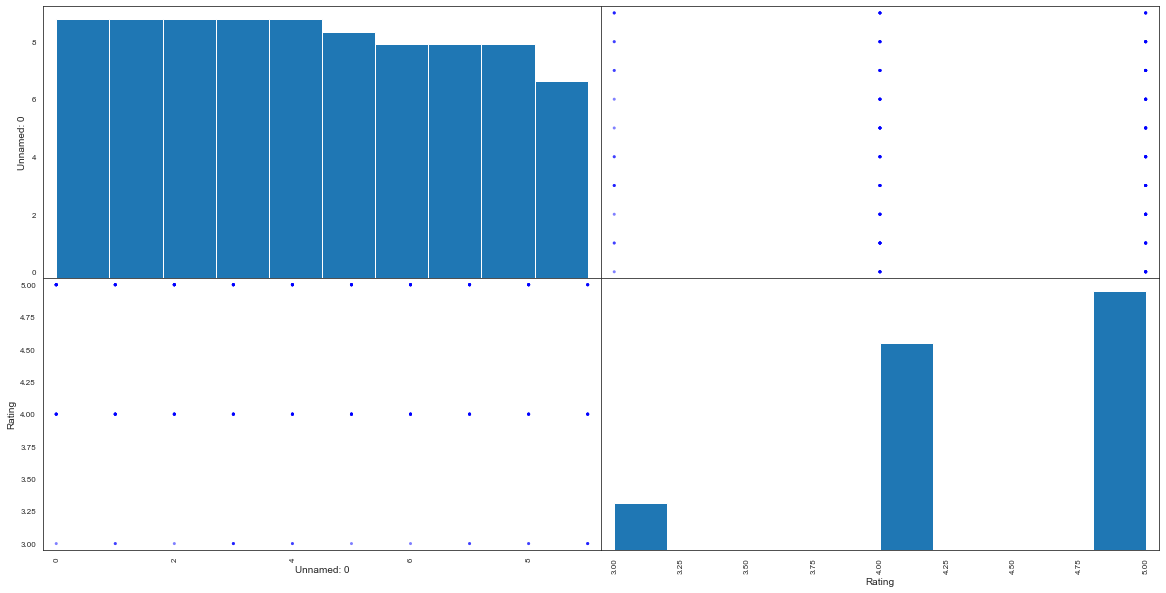

In [28]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(20,10),color='b')
plt.show()

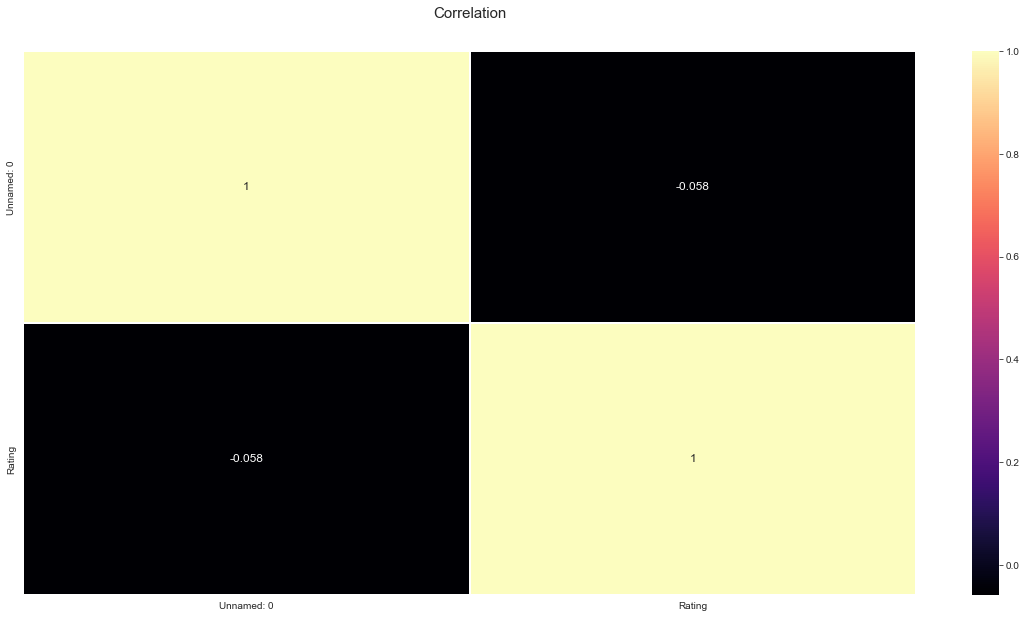

In [29]:
def correlation_heatmap(df):
    ax=plt.subplots(figsize=(20,10))
    colormap=sns.diverging_palette(220, 10, as_cmap = True)
    ax=sns.heatmap(df.corr(),cmap="magma",annot=True,linewidths=0.1,vmax=1.0,linecolor='white',annot_kws={'fontsize':12})
    plt.title('Correlation',y=1.05,size=15)

correlation_heatmap(df)

In [30]:
# categorical value
c=(df.dtypes=="object")
object_cols=list(c[c].index)
print("categorical values: ")
print(object_cols)

categorical values: 
['Reviews']


In [31]:
for i in object_cols:
    print(i, df[i].isnull().sum())

Reviews 0


In [32]:
for i in object_cols:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [33]:
#numerical value
n=(df.dtypes == "float64")
num_cols=list(n[n].index)
print("Numeric values: ")
print(num_cols)

Numeric values: 
[]


In [34]:
for i in num_cols:
    print(i, df[i].isnull().sum())

In [35]:
for i in num_cols:
    df[i].fillna(df[i].median(),inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  198 non-null    int64 
 1   Rating      198 non-null    int64 
 2   Reviews     198 non-null    object
dtypes: int64(2), object(1)
memory usage: 4.8+ KB


In [37]:
# label encoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in object_cols:
    df[i] = label_encoder.fit_transform(df[i])
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  198 non-null    int64
 1   Rating      198 non-null    int64
 2   Reviews     198 non-null    int32
dtypes: int32(1), int64(2)
memory usage: 4.0 KB


#### Data Preprocessing

In [38]:
from sklearn import preprocessing
features=df.drop(['Unnamed: 0','Reviews'],axis=1)
target=df['Rating']
col_names=list(features.columns)
scaler=preprocessing.StandardScaler()
features=scaler.fit_transform(features)
features=pd.DataFrame(features,columns=col_names)
features.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,198.0,-3.364312e-16,1.002535,-2.170608,-0.635678,0.899252,0.899252,0.899252


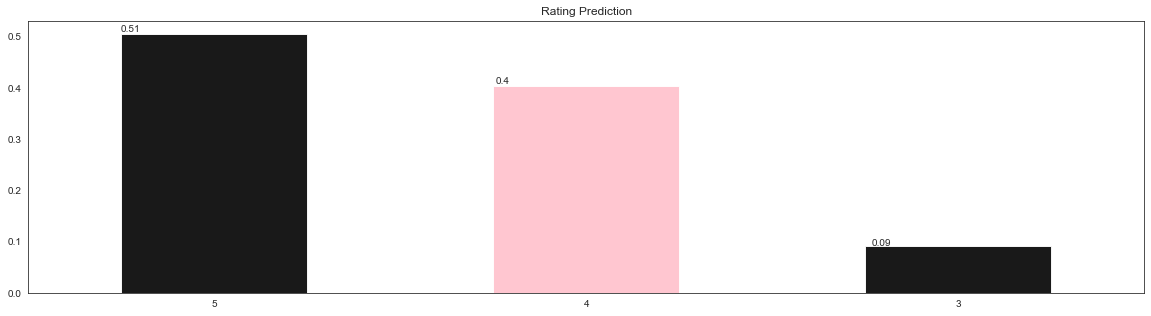

In [39]:
plt.figure(figsize=(20,5))
ax=df.Rating.value_counts(normalize=True).plot(kind='bar', color=['black', 'pink'], alpha=0.9, rot=0)
plt.title('Rating Prediction')
for i in ax.patches:
    ax.annotate(str(round(i.get_height(),2)),(i.get_x() * 1.01, i.get_height() * 1.01))
    
plt.show()  

<AxesSubplot:>

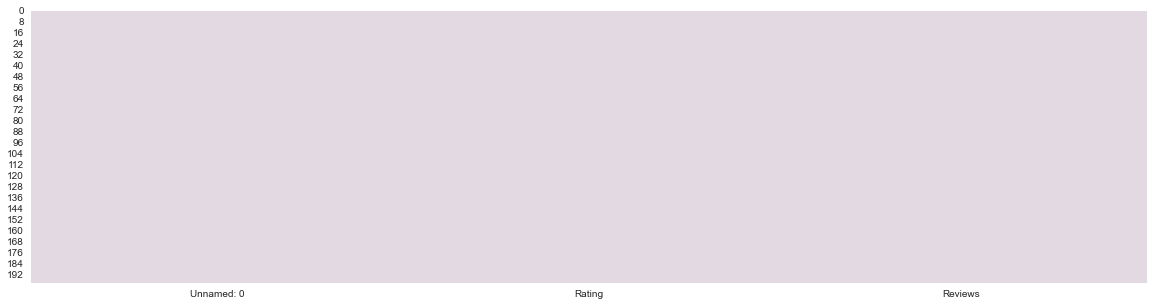

In [40]:
plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(),cbar=False,cmap='twilight')

### Data Cleaning

In [41]:
total=df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total' , 'Percent'])
missing.head()

,Total,Percent
Unnamed: 0,0,0.0
Rating,0,0.0
Reviews,0,0.0


convert categorical fetures to continous features

In [42]:
from sklearn.preprocessing import LabelEncoder
LE={}
for col in df.select_dtypes(include=['object']).columns: 
    LE[col] = LabelEncoder()
    df[col]=LE[col].fit_transform(oversampled[col])

In [43]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed=df.copy(deep=True)
mice_imputer=IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(df)

### Model Building

In [44]:
from sklearn.model_selection import train_test_split
X=features.drop(["Rating"],axis=1)
y=features["Rating"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X.shape

(198, 0)

In [45]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = MiceImputed.drop('Rating', axis=1)
y=MiceImputed['Rating']
selector = SelectFromModel(rf(n_estimators=100,random_state=0))
selector.fit(X,y)
support=selector.get_support()
features=X.loc[:, support].columns.tolist()
print(features)
print(rf(n_estimators=100,random_state=0).fit(X,y).feature_importances_)

['Reviews']
[0.16089828 0.83910172]


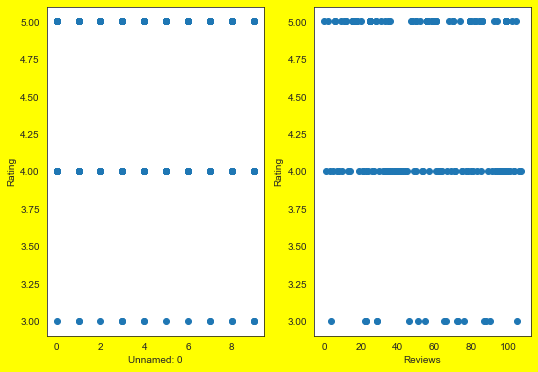

In [46]:
# Visualizing relationship
plt.figure(figsize=(15,10), facecolor= 'yellow')
plotnumber  =  1

for column in X:
    if plotnumber<=8  :
        aX  =  plt.subplot(2,4,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Rating',fontsize=10)
    plotnumber+=1
plt.tight_layout()  

In [47]:
from sklearn.preprocessing import StandardScaler
# Data Scaling Formula Z=(x-mean)/std
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[-1.52399933,  1.39744572],
       [-1.17024567,  1.49836764],
       [-0.81649202, -0.35186749],
       [-0.46273837, -0.78919579],
       [-0.10898471,  1.70021147],
       [ 0.24476894,  0.28730465],
       [ 0.5985226 ,  0.92647678],
       [ 0.95227625, -1.22652409],
       [ 1.3060299 ,  1.33016444],
       [ 1.65978356, -0.04910174],
       [-1.52399933, -1.52928984],
       [-1.17024567,  1.73385211],
       [-0.81649202, -0.95739898],
       [-0.46273837, -1.59657112],
       [-0.10898471,  1.43108636],
       [ 0.24476894,  0.72463295],
       [ 0.5985226 , -1.69749303],
       [ 0.95227625, -0.99103962],
       [ 1.3060299 ,  0.75827359],
       [ 1.65978356,  1.53200828],
       [-1.52399933, -0.48643004],
       [-1.17024567,  0.22002337],
       [-0.81649202, -0.38550813],
       [-0.46273837, -1.39472729],
       [-0.10898471, -1.42836792],
       [ 0.24476894,  0.05182018],
       [ 0.5985226 , -0.4527894 ],
       [ 0.95227625, -0.65463324],
       [ 1.3060299 ,

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [50]:
X_train=df['Reviews']
y_train=df['Rating']

In [51]:
X_train= X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [52]:
# Scaling the values to convert the int values to Machine Langugaes
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
X_train=mmscaler.fit_transform(X_train)
X_test=mmscaler.fit_transform(X_test)
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

In [53]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
outcome=pd.DataFrame(a)
outcome.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [54]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [55]:
# Adjusted R2 score
regression.score(X_train,y_train)

0.0005349260950145984

In [56]:
y_pred = regression.predict(X_test)
y_pred

array([4.43969549, 4.41359969, 4.4422539 , 4.39159734, 4.43764876,
       4.40592445, 4.4422539 , 4.38903893, 4.44174222, 4.43867213,
       4.44123054, 4.41001791, 4.44174222, 4.39313239, 4.44123054,
       4.42946184, 4.43969549, 4.41104127, 4.43918381, 4.43611371,
       4.44071886, 4.42946184, 4.43918381, 4.39159734, 4.43918381,
       4.41769315, 4.44123054, 4.41359969, 4.44174222, 4.42536838,
       4.43969549, 4.41359969, 4.44020717, 4.39159734, 4.43867213,
       4.42434502, 4.44020717, 4.40183099, 4.43969549, 4.413088  ,
       4.43918381, 4.39773753, 4.43867213, 4.41359969, 4.43867213,
       4.43304362, 4.43764876, 4.42741511, 4.43816044, 4.42946184,
       4.44174222, 4.40183099, 4.43969549, 4.42178661, 4.44123054,
       4.41922819, 4.44123054, 4.42843848, 4.44123054, 4.39466744,
       4.43764876, 4.39159734, 4.44123054, 4.41973988, 4.4422539 ,
       4.43150857, 4.44123054, 4.39927258, 4.44071886, 4.43048521,
       4.44174222, 4.40183099, 4.44174222, 4.40029594, 4.44225

#### Model Evaluation

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred=regression.predict(X_test)

In [58]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV
from sklearn.model_selection import GridSearchCV
# LassoCV will return bestalpha after max iteration
#Normalize is subtracting the mean and dividing by the L2-norm

lassoregularization=Lasso()
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}

lasscv=GridSearchCV(lassoregularization,parameters,scoring='neg_mean_squared_error', n_jobs=-1,cv=5)


lasscv  =  LassoCV(alphas  =  None, max_iter  =  100, normalize  =  True)
lasscv.fit(X_train, y_train)

LassoCV(max_iter=100, normalize=True)

In [59]:
#best alpha parameter
alpha  =  lasscv.alpha_
alpha

0.001070842915395528

In [60]:
#now that we have best parameter, Let's use Lasso regression and see how well our data has fitted before

lasso_reg  =  Lasso(alpha)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.001070842915395528)

In [61]:
# RidgeCV will return best alpha and coefficients after performing 10 cross validations.

ridge_regressor=Ridge()
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}

ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)

ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [62]:
df.head()

,Unnamed: 0,Rating,Reviews
0,0,4,97
1,1,4,100
2,2,4,45
3,3,4,32
4,4,4,106


In [63]:
X_train=df['Reviews']
X_test=df['Unnamed: 0']
y=df.Rating

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler=StandardScaler()
X_train=X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=0.3,random_state=42)

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(X_train, y_train)
pred = gbdt_clf.predict(X_train)

gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict=True))

print("\n====================Train Result=====================")

print("Accuracy Score: ",accuracy_score(y_train,pred)*100 )

print("__________________________________________________")
print(f"CLASSIFICATION REPORT : \n{gbdt_clf_report}")
print("___________________________________________________")
print(f"Cofusion Matrix:  \n {confusion_matrix(y_train, pred)}\n")

#****************************Test score********************************

pred = gbdt_clf.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))

print("\n==================Test Result==========================")
print("Accuracy: ", accuracy_score(y_test,pred) * 100)
print("_____________________________________________")
print(f"CLASSIFICATION REPORT :\n{clf_report}")
print("______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")



====================Train Result=====================
Accuracy Score:  94.20289855072464
__________________________________________________
CLASSIFICATION REPORT : 
                   3          4          5  accuracy   macro avg  weighted avg
precision   0.937500   0.962963   0.926471  0.942029    0.942311      0.943007
recall      1.000000   0.896552   0.969231  0.942029    0.955261      0.942029
f1-score    0.967742   0.928571   0.947368  0.942029    0.947894      0.941683
support    15.000000  58.000000  65.000000  0.942029  138.000000    138.000000
___________________________________________________
Cofusion Matrix:  
 [[15  0  0]
 [ 1 52  5]
 [ 0  2 63]]


==================Test Result==========================
Accuracy:  63.33333333333333
_____________________________________________
CLASSIFICATION REPORT :
             3          4          5  accuracy  macro avg  weighted avg
precision  0.0   0.526316   0.777778  0.633333   0.434698      0.646686
recall     0.0   0.454545   0

In [66]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV
grid_param = {
      'max_depth' : range(4,8),
      'min_sample_split' : range(2,8,2),
      'learning_rate' : np.arange(0.1,0.3)
}

In [67]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
#y_pred=randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test, y_test)
print('The accuracy of the Random Forest Model is ', score_randomforest)

The accuracy of the Random Forest Model is  0.65


In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
#y_pred=knn.predict(X_test)
score_knn=knn.score(X_test,y_test)
print('The accuracy of the KNN Model is' , score_knn)

The accuracy of the KNN Model is 0.6166666666666667


In [69]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#y_pred=logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
print('The accuracy of the LogisticRegression is', score_logreg)

The accuracy of the LogisticRegression is 0.5833333333333334


In [70]:
from sklearn.svm import SVC
svc = SVC(gamma=0.22)
svc.fit(X_train, y_train)
#y_pred=logreg.predict(X_test)
score_svc=svc.score(X_test, y_test)
print('The accuarcy of SVC is', score_svc)

The accuarcy of SVC is 0.5833333333333334


### Selecting the best model

In [71]:
print('The accuracy of the KNN Model is 0.6166666666666667')
print('The accuracy of the Random Forest Model is  0.65')

The accuracy of the KNN Model is 0.6166666666666667
The accuracy of the Random Forest Model is  0.65


# THANK YOU